# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, March 21, 2017

This lab will be mainly about
* common probability distributions
* evaluating the pdf's of deterministically-transformed random variables
* inverse-transform sampling

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

### Recap - Distributions

#### Bernoulli Distribution

* PMF: $$
\mathrm{Bernoulli}(p): \Pr(X=x) = p^x \left(1-p\right) ^{1-x} = \begin{cases}
p & \text{if}\quad x=1 \\
1 - p & \text{if}\quad x=0
\end{cases}
$$
* Example: Flipping a coin *once*.  The coin may be biased.

#### Binomial Distribution

* Models the number of 1's in multiple Bernoulli trials, each with the same $p$.
* PMF: $$
B(n,p): \Pr(X=x) = \binom{n}{x} p^x (1-p)^{n-x}
$$
* Example: Flipping the same coin n times and observing the number of heads in total.

In [2]:
# Sampling from Bernoulli(0.4)
print('Bernoulli(0.4) sample:', np.random.binomial(1, 0.4))
# Sampling from B(5, 0.4)
print('B(5, 0.4) sample:', np.random.binomial(5, 0.4))

# Computing the PMF and CDF of binomial random variables
binomial_rv = scipy.stats.binom(5, 0.4)
print('B(5, 0.4) PMF:', [binomial_rv.pmf(i) for i in range(5)])
print('B(5, 0.4) CDF:', [binomial_rv.cdf(i) for i in range(5)])

Bernoulli(0.4) sample: 1
B(5, 0.4) sample: 1
B(5, 0.4) PMF: [0.07776, 0.2591999999999999, 0.3455999999999999, 0.2304, 0.07680000000000001]
B(5, 0.4) CDF: [0.07775999999999998, 0.33696, 0.6825599999999997, 0.91296, 0.98976]


#### Categorical Distribution

* Sometimes called "multinoulli" distribution
* PMF: $$
\mathrm{Cat}(\mathbf{p}): \Pr(\mathbf{X}=\mathbf{x}) = \prod_{i=1}^K p_i^{x_i}
$$
  * Here $\mathbf{p}$ and $\mathbf{x}$ are K-dimensional *vectors*.  Notably, $\mathbf{x}$ is a vector with a single 1 and K-1 0's (usually called a *one-hot* vector).
* Example: Rolling a die *once*.  The die can be biased.
* If $p_i$ is the same for all $i$ then we call it a *uniform* (categorical) distribution.

#### Multinomial Distribution
* Models the *counts* of outcomes of multiple categorical trials
* PMF: $$
\Pr(\mathbf{X}=\mathbf{x}) = \dfrac{n!}{\prod_{i=1}^K x_i!} \prod_{i=1}^K p_i^{x_i}
$$
* Example: Rolling the same die n times and observing the number of different values in total.

In [3]:
# Sampling from a 6-sided die with some bias
print('Categorical sample:', np.random.multinomial(1, [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]))
# Throwing this die 20 times
print('Multinomial sample:', np.random.multinomial(20, [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]))
# If you care about the actual face values rather than the counts, you can as well use this:
print('6-sided biased die trial:', np.random.choice(6, p=[0.1, 0.2, 0.2, 0.2, 0.2, 0.1]))
print('20 6-sided biased die trials:', np.random.choice(6, size=20, p=[0.1, 0.2, 0.2, 0.2, 0.2, 0.1]))
# Even simpler if you die is uniform
print('6-sided fair die trial:', np.random.randint(0, 6))
print('20 6-sided fair die trials:', np.random.randint(0, 6, 20))

# Computing the PMF for multinomial distributions (categorical is just a special case)
# scipy does not come with CDF for multinomials as computing the exact CDF requires combinatorial time complexity.
# For approximate methods, see https://projecteuclid.org/download/pdf_1/euclid.aos/1176345593
multinomial_rv = scipy.stats.multinomial(20, [0.1, 0.2, 0.2, 0.2, 0.2, 0.1])
print('Multinomial PMF:', multinomial_rv.pmf([2, 1, 5, 4, 4, 4]))

Categorical sample: [0 0 0 0 1 0]
Multinomial sample: [1 6 6 4 1 2]
6-sided biased die trial: 1
20 6-sided biased die trials: [0 4 2 5 0 0 5 2 2 4 3 0 3 2 4 3 1 3 1 3]
6-sided fair die trial: 2
20 6-sided fair die trials: [0 2 0 0 0 0 2 5 1 1 3 5 4 0 4 3 2 5 4 4]
Multinomial PMF: 0.00012014330904576007


#### Geometric Distribution

* Models the number of Bernoulli trials to get the first success, i.e. a 1.  Whether to include the success itself depends on the context.
* PMF excluding the successful trial (i.e. only counting the failures) $$
\Pr(X=x) = \left(1 - p\right)^x p \qquad x \in \mathbb{N}
$$
    * Mean: $\dfrac{1 - p}{p}$
    * Variance: $\dfrac{1 - p}{p^2}$
* PMF including the successful trial (both `numpy` and `scipy` use this): $$
\Pr(X=x) = \left(1 - p\right)^{x-1} p \qquad x \in \mathbb{N}^+
$$
    * Mean: $\dfrac{1}{p}$
    * Variance: $\dfrac{1 - p}{p^2}$
* Example: flipping the same coin until we get heads, and counting the number of tails.

Geometric sample: 4


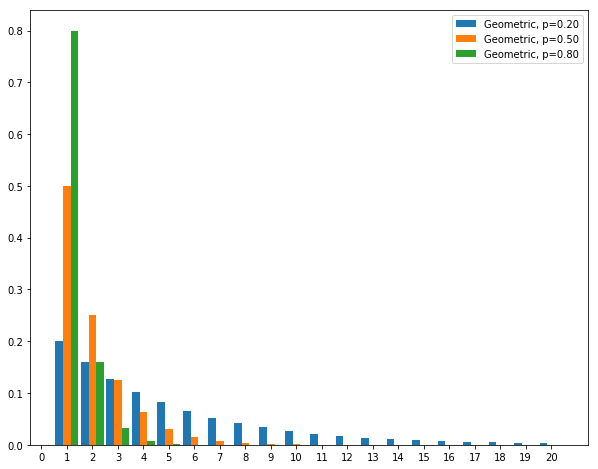

In [4]:
# Both numpy and scipy counts the successful trials.
print('Geometric sample:', np.random.geometric(0.4))

# Plotting PMF
for i, p in enumerate([0.2, 0.5, 0.8]):
    geo_rv = scipy.stats.geom(p)
    x = np.arange(1, 21)
    y = geo_rv.pmf(x)
    # See https://docs.python.org/3.4/library/string.html#format-string-syntax for how to use format()
    plt.bar(x + 0.3 * i - 0.3, y, width=0.3, label='Geometric, p={:.2f}'.format(p))
plt.legend(loc='best')
plt.xticks(np.arange(0, 21))
plt.gcf().set_size_inches(10, 8)
plt.show()

#### Poisson Distribution

* Models the number of (independent) occurrences of an event in a fixed time period, assuming the rate of occurrence to be constant and known beforehand.
* PMF: $$
\mathrm{Poisson}(\lambda): \Pr(X=x) = \dfrac{\lambda^x e^{-\lambda}}{x!} \qquad x \in \mathbb{N}
$$
* Mean: $\lambda$
* Variance: $\lambda$
* Example: Number of taxis driving past some street, or number of calls received, etc., in a fixed period.

Poisson sample: 0


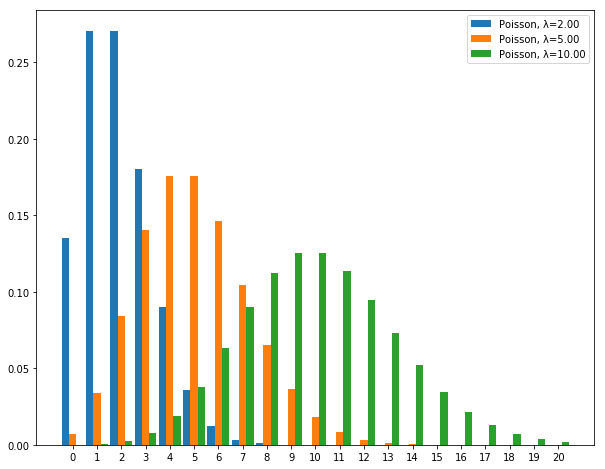

In [5]:
print('Poisson sample:', np.random.poisson(0.4))

# Plotting PMF
for i, lambda_ in enumerate([2, 5, 10]):
    poisson_rv = scipy.stats.poisson(lambda_)
    x = np.arange(0, 21)
    y = poisson_rv.pmf(x)
    # See https://docs.python.org/3.4/library/string.html#format-string-syntax for how to use format()
    # And yes you can freely write non-ASCII characters in Python 3 since it supports Unicode natively.
    # You can even use Unicode characters as variable names.
    plt.bar(x + 0.3 * i - 0.3, y, width=0.3, label='Poisson, λ={:.2f}'.format(lambda_))
plt.legend(loc='best')
plt.xticks(np.arange(0, 21))
plt.gcf().set_size_inches(10, 8)
plt.show()

#### Uniform Continuous Distribution

* Given two values, all numbers between the two are equally likely to be sampled.
    * More rigorously, *all intervals of the same length are equally probable* (taken from Wikipedia).
* PDF: $$
\mathcal{U}(a,b): p(x) = \begin{cases}
\frac{1}{b-a} & x \in \left[a, b\right] \\
0 & \text{otherwise}
\end{cases}
$$
* Mean: $\frac{1}{2}\left(a + b\right)$
* Variance: $\frac{1}{12} \left(b - a\right)^2$

10 U(2, 5) samples: [3.29000084 3.15926897 2.28675314 4.85978993 3.2122293  4.75897701
 2.46398887 2.2867029  3.77954358 2.29644503]
10 U(0, 1) samples: [0.65032151 0.24540994 0.25781938 0.84807222 0.35706292 0.56400834
 0.31185577 0.01411852 0.67094656 0.26285243]


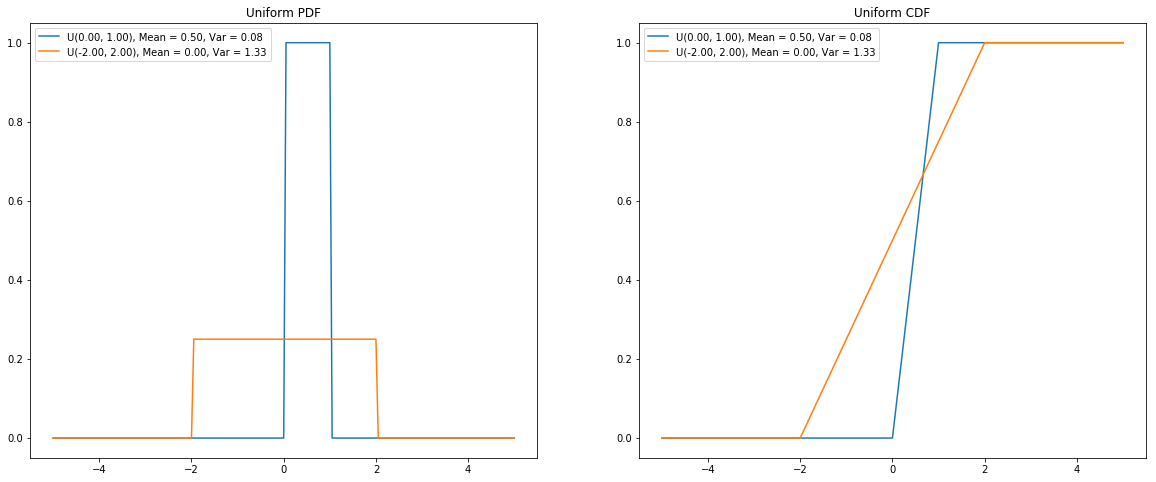

In [6]:
# Note that different softwares may or may not include the lower or upper boundary.
# numpy excludes the upper boundary while includes the lower one.
print('10 U(2, 5) samples:', np.random.uniform(2, 5, 10))
print('10 U(0, 1) samples:', np.random.rand(10))
X = np.arange(-5, 5.05, 0.05)
fig, ax = plt.subplots(1, 2)
for a, b in [(0, 1), (-2, 2)]:
    uniform_rv = scipy.stats.uniform(a, b - a)
    label = 'U({:.2f}, {:.2f}), Mean = {:.2f}, Var = {:.2f}'.format(a, b, uniform_rv.mean(), uniform_rv.var())
    ax[0].plot(X, uniform_rv.pdf(X), label=label)
    ax[1].plot(X, uniform_rv.cdf(X), label=label)
ax[0].set_title('Uniform PDF')
ax[1].set_title('Uniform CDF')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.set_size_inches(20, 8)
plt.show()

#### Normal Distribution

* Very common and well known distribution that [approximately models the sum of independent variables](https://en.wikipedia.org/wiki/Central_limit_theorem)
* PDF: $$
\mathcal{N}(\mu, \sigma^2): p(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\dfrac{\left(x - \mu\right)^2}{2 \sigma^2}\right)
$$
* Mean: $\mu$
* Variance: $\sigma^2$
* Does not have a closed-form CDF
* Closed under linear transformations:
  * If $X\sim \mathcal{N}(\mu, \sigma^2)$, then $aX + b \sim \mathcal{N}(\mu + b, a^2\sigma^2)$
  * If $X_1 \sim \mathcal{N}(\mu_1, \sigma_1^2)$ and $X_2 \sim \mathcal{N}(\mu_2, \sigma_2^2)$, then $X_1 + X_2 \sim \mathcal{N}(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$

##### Multivariate Normal Distribution

* PDF: $$
\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}): p(\mathbf{x}) = (2 \pi)^{-k/2} \det(\Sigma)^{-1/2} \exp\left[-\dfrac{1}{2} \left(\mathbf{x} - \boldsymbol{\mu}\right)^T \boldsymbol{\Sigma}^{-1} \left(\mathbf{x} - \boldsymbol{\mu}\right)\right]
$$
  * $\boldsymbol{\Sigma}$ must be positive-definite.
* Mean: $\boldsymbol{\mu}$
* Covariance matrix: $\boldsymbol{\Sigma}$
* Similarly closed under affine transformations but we won't cover it here.

##### Log-Normal Distribution

* The exponential of a normal random variable.
* PDF: $$
p(x) = \dfrac{1}{x\sigma \sqrt{2\pi}} \exp\left(-\dfrac{(\log x - \mu)^2}{2\sigma^2}\right)
$$
* Won't go through the detail here.

##### Von-Mises Distribution

* The counterpart of normal distribution on a finite support.
* PDF: $$
p(x) = \exp[\kappa \cos (x-\mu)] / Z
$$
where $Z$ is the normalization constant.
* Won't go through the detail here.

10 N(0, 1) samples: [ 1.87795355  0.41277953 -0.38253981 -0.68625459 -1.00031167  1.64101583
  0.33139705  1.55069791 -1.78893785 -1.32564811]


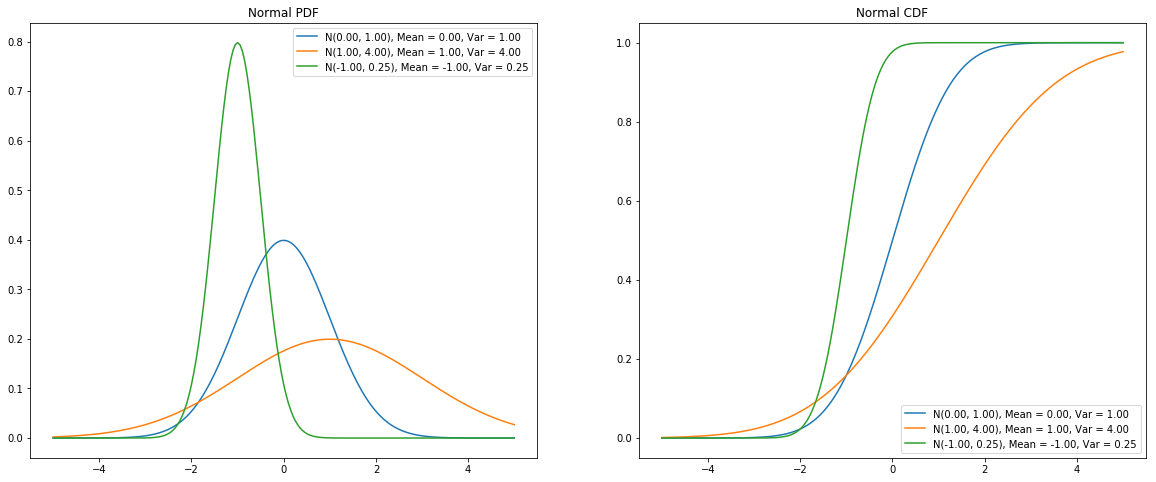

In [7]:
# Univariate normal
print('10 N(0, 1) samples:', np.random.randn(10))
# Although no closed-form CDF for normal distribution exist, scipy does come with a CDF function.
# Also, note that for univariate normal distributions, numpy and scipy take standard deviation rather than variance.
fig, ax = plt.subplots(1, 2)
X = np.arange(-5, 5.05, 0.05)
for mu, sigma in [(0, 1), (1, 2), (-1, 0.5)]:
    normal_rv = scipy.stats.norm(mu, sigma)
    label = 'N({:.2f}, {:.2f}), Mean = {:.2f}, Var = {:.2f}'.format(mu, sigma ** 2, normal_rv.mean(), normal_rv.var())
    ax[0].plot(X, normal_rv.pdf(X), label=label)
    ax[1].plot(X, normal_rv.cdf(X), label=label)
ax[0].set_title('Normal PDF')
ax[1].set_title('Normal CDF')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.set_size_inches(20, 8)
plt.show()

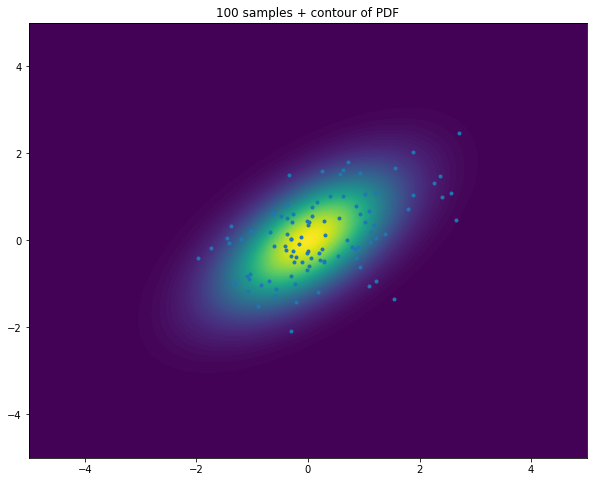

In [8]:
# Bivariate normal with non-diagonal covariance matrix:
mean = np.array([0, 0])
var = np.array([[1, 0.6], [0.6, 1]])
samples = np.random.multivariate_normal(mean, var, 100)
plt.plot(samples[:, 0], samples[:, 1], '.')
X = np.arange(-5, 5.05, 0.05)
# Now we plot the contour of the PDF of this bivariate normal distribution
bivar_norm_rv = scipy.stats.multivariate_normal(mean, var)
XX, YY = np.meshgrid(X, X)
ZZ = bivar_norm_rv.pdf(np.stack([XX, YY], axis=-1))
plt.contourf(XX, YY, ZZ, 100)

plt.gcf().set_size_inches(10, 8)
plt.title('100 samples + contour of PDF')
plt.show()

#### Exponential distribution

* The continuous counterpart of the geometric distribution
* Models the time between consecutive independent event with a constant occurrence rate (the same process in Poisson distribution)
* PDF: $$
\mathrm{Exp}(\lambda): p(x) = \lambda \exp (-\lambda x) \qquad x>0
$$
* Mean: $1/\lambda$
* Variance: $1/\lambda^2$

10 Exp(1) samples: [1.74362665 0.09019753 1.21527572 0.27577777 2.95125627 0.31600446
 4.08236169 1.36553116 1.2443291  0.900694  ]


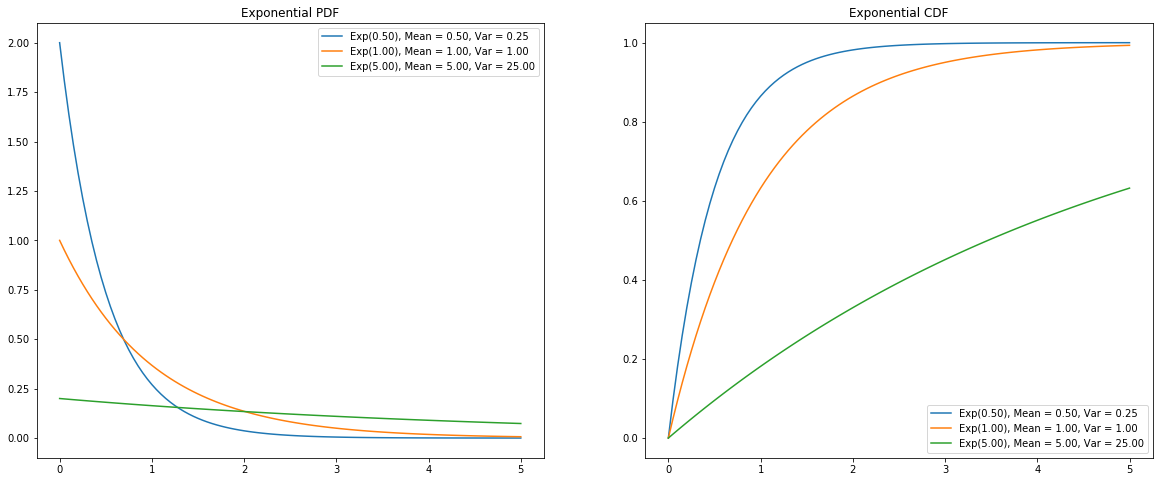

In [9]:
# Exponential
print('10 Exp(1) samples:', np.random.exponential(1, 10))
fig, ax = plt.subplots(1, 2)
X = np.arange(0, 5.05, 0.05)
for lambda_ in [0.5, 1, 5]:
    # Note that scipy takes an additional `loc` argument that dictates the offset of the pdf.
    exp_rv = scipy.stats.expon(0, lambda_)
    label = 'Exp({:.2f}), Mean = {:.2f}, Var = {:.2f}'.format(lambda_, exp_rv.mean(), exp_rv.var())
    ax[0].plot(X, exp_rv.pdf(X), label=label)
    ax[1].plot(X, exp_rv.cdf(X), label=label)
ax[0].set_title('Exponential PDF')
ax[1].set_title('Exponential CDF')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.set_size_inches(20, 8)
plt.show()

### Finding pdf of a deterministically-transformed distribution

Now let's see how we can get the pdf of log-normal random variable $Y=\exp(X)$, where $X \sim \mathcal{N}(\mu, \sigma^2)$.

By noticing that $$
F_Y(y) = F_Y(e^x) = \Pr(Y \le e^x) = \Pr(X \le x) = F_X(x)
$$

Differentiating both sides yields
$$
p_Y(y) dy = p_X(x) dx
$$
hence
$$
p_Y(y) = \dfrac{dx}{dy} p_X(x) = \dfrac{1}{y \sqrt{2 \pi \sigma^2}} \exp\left( -\dfrac{\left(\log y - \mu\right)^2}{2 \sigma^2}\right)
$$

For monotonically decreasing functions we need to reverse the CDF to $F_Y(y) = 1 - F_X(x)$.  For non-monotonic functions, finding the exact pdf would be quite a hassle, since we need to decompose the function into monotonic pieces.

### Inverse transform sampling

The problem above asks to find the pdf of a random variable.  Now let's consider the inverse problem of generating a random variables from a pdf or pmf, given that we have the generators of some simple distributions (e.g. uniform and normal).  Such a process is very useful to estimate properties of a distribution with Monte Carlo method.

Arguably the easiest case would be generating categorical distributions.  In that case, we can simply compute the cdf of the categorical distribution, generate a sample $u \sim \mathcal{U}(0, 1)$, and then check which range $u$ falls in:

In [10]:
# Of course, you don't want to do it with numpy - use multinomial() or choice() instead.
# But if you are using some toolkit or programming language that has no categorical random variable generator, then
# you can do something like this.
pmf = np.array([0.1, 0.3, 0.4, 0.2])
cdf = np.cumsum(pmf)
u = np.random.rand()
# Find the first index whose cdf value is greater than u.  The index would be the generated random variable.
print((u < cdf).nonzero()[0][0])

0


Actually, this idea can be extended to continuous cases, as long as we know the CDF $F_x$:

1. Sample $u \sim \mathcal{U}(0, 1)$.
2. Set $x = F_X^{-1}(u)$.

Let's take the exponential distribution as an example.  The CDF of exponential distribution $\mathrm{Exp}(1)$ is:
$$
F_X(x) = 1 - \exp(-x)
$$

We can generate $x \sim \mathrm{Exp}(1)$ by sampling $u \sim \mathcal{U}(0, 1)$ and then setting $x = -\log (1 - u)$.

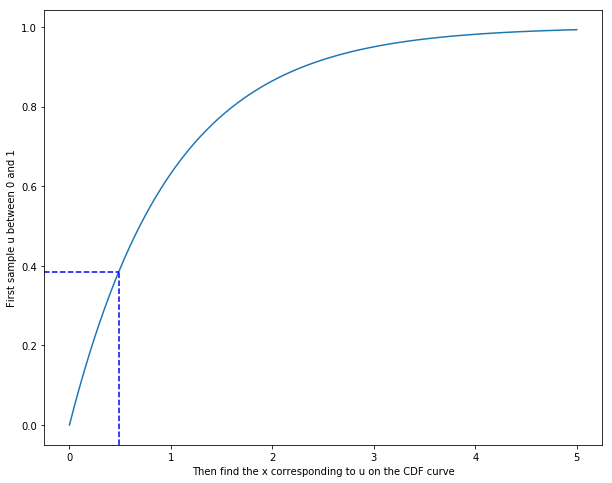

0.4857123391034592


In [11]:
lambda_ = 1

exp_rv = scipy.stats.expon(0, lambda_)
label = 'Exp({:.2f}), Mean = {:.2f}, Var = {:.2f}'.format(lambda_, exp_rv.mean(), exp_rv.var())
plt.plot(X, exp_rv.cdf(X), label=label)
x_left, x_right = plt.xlim()
y_bottom, y_top = plt.ylim()

u = np.random.rand()
x = -np.log(1 - u)
plt.plot([x_left, x], [u, u], 'b--')
plt.plot([x, x], [y_bottom, u], 'b--')
plt.ylabel('First sample u between 0 and 1')
plt.xlabel('Then find the x corresponding to u on the CDF curve')
plt.xlim(x_left, x_right)
plt.ylim(y_bottom, y_top)
plt.gcf().set_size_inches(10, 8)
plt.show()
print(x)

Unfortunately, sampling from arbitrary pdf or pmf can be quite complicated, since most of the time we don't know how to compute CDF (or even pdf, if the function is unnormalized).  Advanced topics of sampling is well beyond the scope of this course.

If interested, one can take a look at https://cims.nyu.edu/~cfgranda/pages/DSGA1002_fall16/material/simulation.pdf (Carlos has a more complete version of the Stats Lecture Note [here](https://cims.nyu.edu/~cfgranda/pages/stuff/probability_stats_for_DS.pdf)).